## 🔎 EDA(Exploratory Data Analysis)

Here we will Perform Exploratory Data Analysis of Flight Fare Price Cleaned Dataset, we will find all insights, based on that insights will decide to perfom furthur changes in the datset

#### Importing Library 

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

In [220]:
# importing cleaned flight fare dataset
clean = pd.read_excel('clean_dataset_flight.xlsx')

In [221]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Total_Stops      10462 non-null  object
 5   Additional_Info  10462 non-null  object
 6   Price            10462 non-null  int64 
 7   Journey_Day      10462 non-null  int64 
 8   Journey_Month    10462 non-null  int64 
 9   Dep_Hours        10462 non-null  int64 
 10  Dep_Mins         10462 non-null  int64 
 11  Arrival_Hours    10462 non-null  int64 
 12  Arrival_Mins     10462 non-null  int64 
 13  Duration_Hours   10462 non-null  int64 
 14  Duration_Mins    10462 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.2+ MB


In [222]:
df_clean = clean.copy()

In [223]:
# will seprate categorical and numerical data seperate
# numerical
numerical = [i for i in df_clean.columns if df_clean[i].dtype != 'object']
# categorical 
categorical = [i for i in df_clean.columns if i not in numerical]

In [224]:
numerical

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hours',
 'Dep_Mins',
 'Arrival_Hours',
 'Arrival_Mins',
 'Duration_Hours',
 'Duration_Mins']

In [225]:
categorical

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [226]:
df_clean[numerical].describe()

,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189
std,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185
min,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [227]:
#pip install sweetviz

In [228]:
import sweetviz as sv
from IPython.display import IFrame

In [229]:
report = sv.analyze(df_clean[numerical])
IFrame(src='report.html', width=1000, height=600)

                                             |      | [  0%]   00:00 -> (? left)

#### Analysing Airlines

In [231]:
airlines = df_clean["Airline"]

In [232]:
airlines.nunique()

12

In [233]:
airlines.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

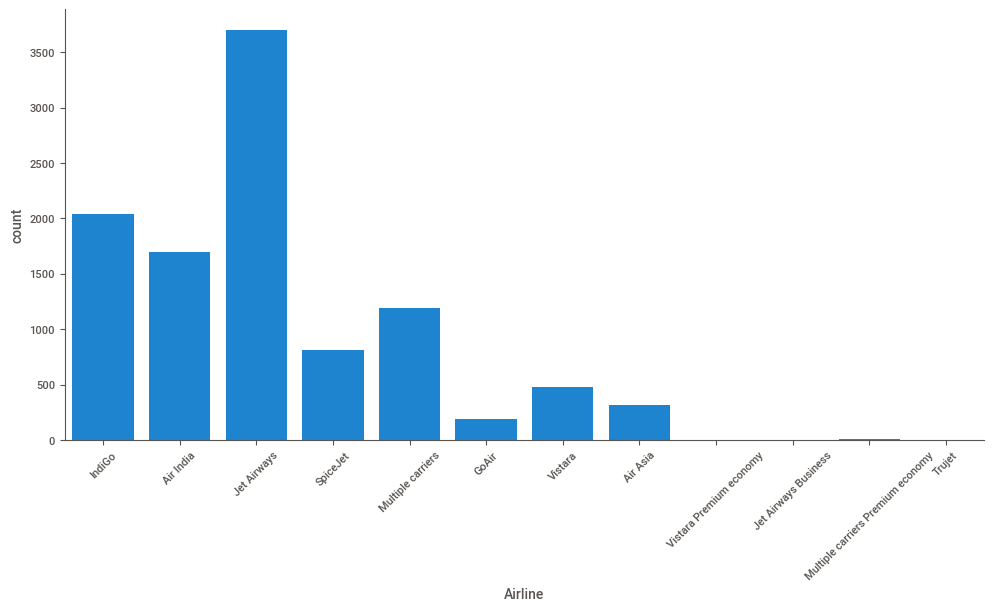

In [234]:
sns.catplot(data = df_clean,x = 'Airline', kind = 'count',aspect = 2).set_xticklabels(rotation = 45)
plt.show()

In [235]:
airlines.value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [236]:
airlines.value_counts().max()

3700

In [237]:
airlines.value_counts().min()

1

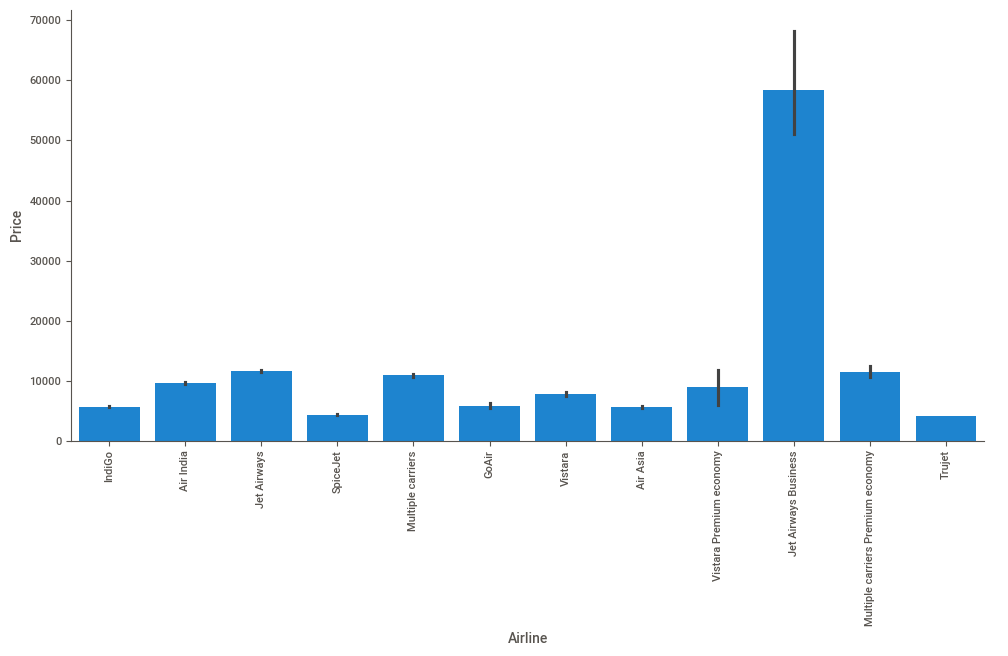

In [238]:
sns.catplot(data = df_clean, x = 'Airline', y = 'Price', kind = 'bar', aspect= 2 ).set_xticklabels(rotation = 90)

In [239]:
df_clean['Price'].max()

79512

In [240]:
df_clean[df_clean['Price'] == df_clean['Price'].max()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
2904,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,1,3,5,45,11,25,5,40


In [241]:
df_clean[df_clean['Price'] == df_clean['Price'].min()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
4027,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No Info,1759,21,3,22,45,0,10,1,25
4232,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No Info,1759,27,3,22,45,0,10,1,25
4789,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No Info,1759,3,4,22,45,0,15,1,30
10303,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No Info,1759,27,3,5,45,7,5,1,20


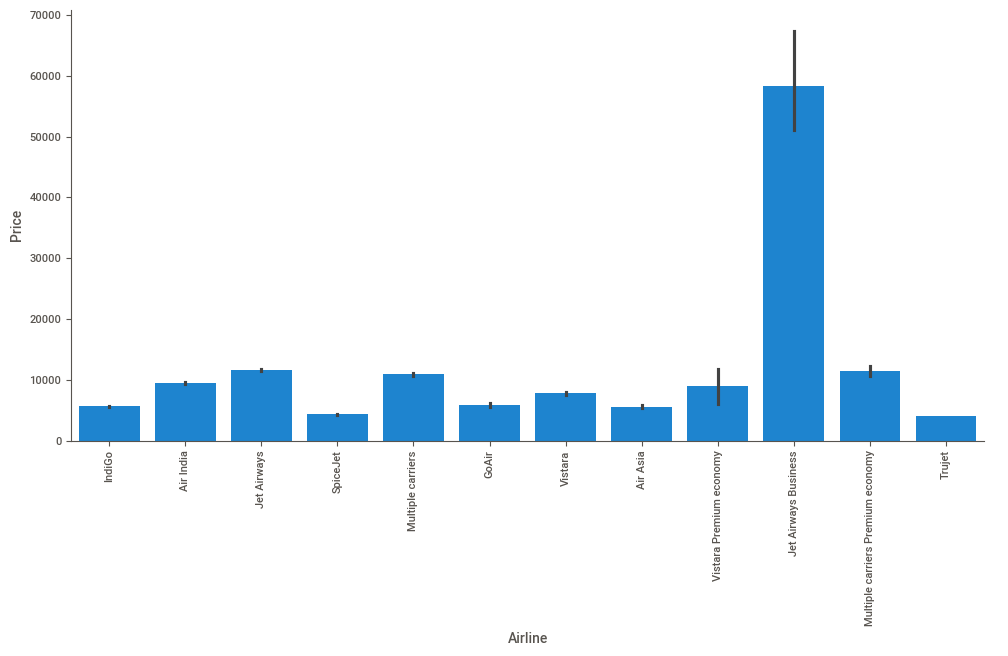

In [242]:
sns.catplot(data = df_clean, x = 'Airline', y = 'Price', kind = 'bar', aspect= 2).set_xticklabels(rotation = 90)

#### 🔎 Insights gain from Airlines

1. There are 12 different Airlines 'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy', 'Jet Airways Business',Multiple carriers Premium economy', 'Trujet' <br>

2. Maximum number of flights are of __Jet Airways__,followed by IndiGo and Air India

3. There are very few number of Flights which are Multiple carriers Premium economy, Jet Airways Business ,Vistara Premium economy        ,Trujet, and only onr flight Trujet which is very least

4. The Most expensive fare is of Rs 79512 by __Jet Airways Business__, its a business class ticket thats why it is expensive, The Flight is   from __Banglore to New Delhi__ and had a single stop at __Mumbai__ ,flight departure at early morning (5:45) and land on same day (11:25) about 5h and 40 mins journey

5. The Least Expensive fare is of Rs 1759 by __SpiceJet__

In [245]:
#### Analysis of Source, Destination, source+Destination

In [246]:
df_clean['Source'].nunique()

5

In [247]:
df_clean['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [248]:
df_clean['Source'].describe()

count     10462
unique        5
top       Delhi
freq       4345
Name: Source, dtype: object

Text(0.5, 28.99999999999998, 'Departure City')

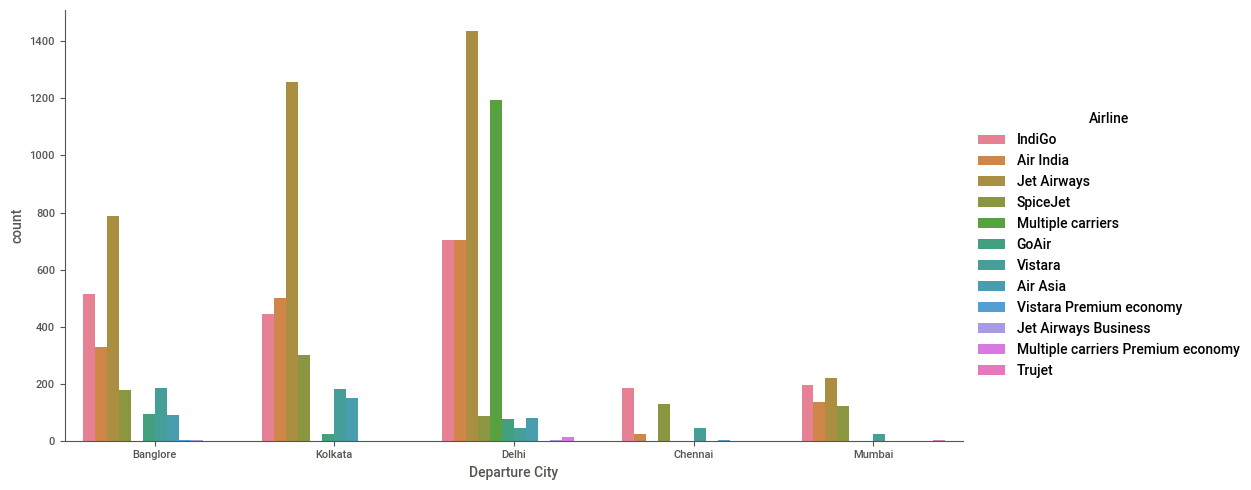

In [249]:
sns.catplot(data = df_clean , x = 'Source', kind = 'count',hue = 'Airline',aspect = 2)
plt.xlabel('Departure City')

In [250]:
df_source_dest = df_clean.groupby(['Source','Destination'])['Airline'].value_counts()

In [251]:
df_source_dest = df_source_dest.reset_index()

In [252]:
df_source_dest['Source - Destination'] = df_source_dest['Source'] +'-'+ df_source_dest['Destination']

In [253]:
df_source_dest.drop(columns = ['Source','Destination'])

,Airline,count,Source - Destination
0,Jet Airways,370,Banglore-Delhi
1,IndiGo,366,Banglore-Delhi
2,SpiceJet,137,Banglore-Delhi
3,Vistara,131,Banglore-Delhi
4,Air India,120,Banglore-Delhi
5,Air Asia,71,Banglore-Delhi
6,GoAir,69,Banglore-Delhi
7,Vistara Premium economy,1,Banglore-Delhi
8,Jet Airways,417,Banglore-New Delhi
9,Air India,209,Banglore-New Delhi


In [254]:
k = list(df_source_dest['Source - Destination'].unique())

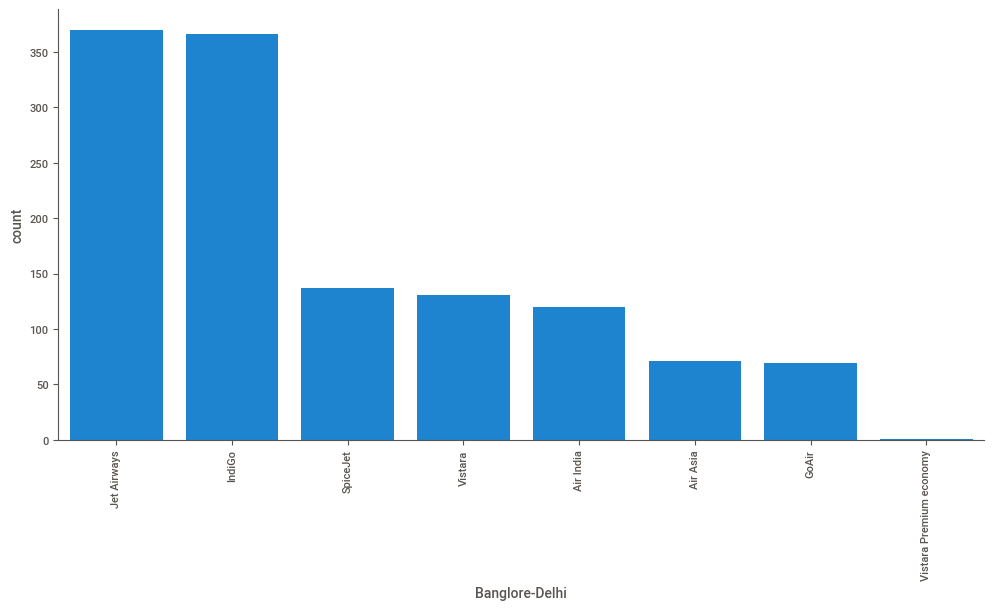

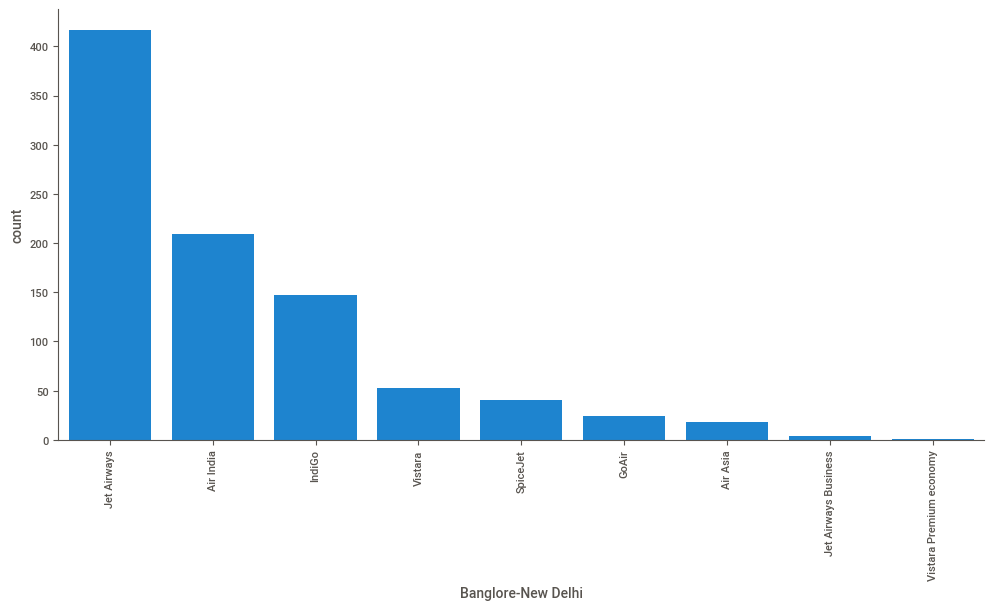

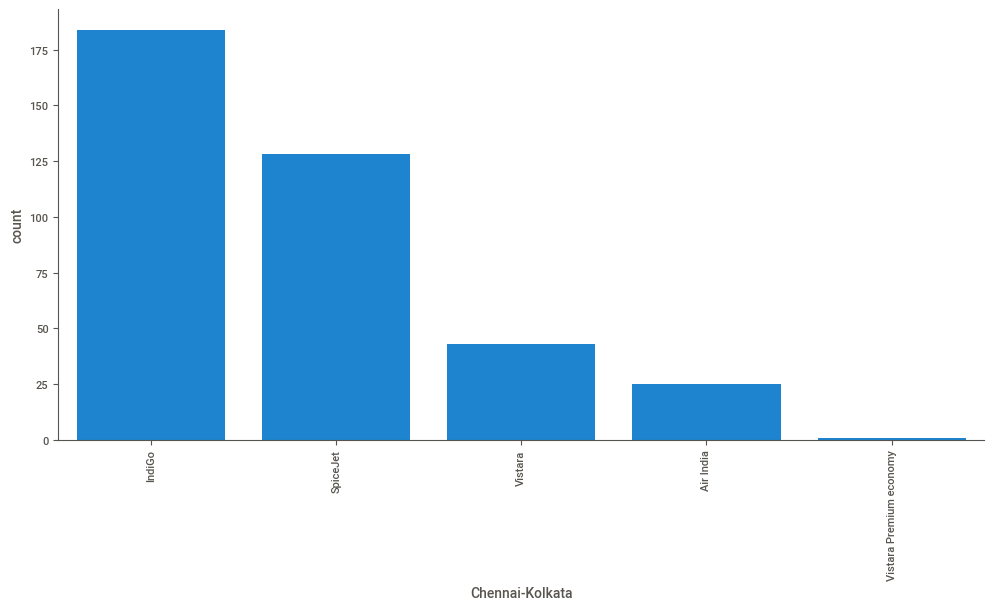

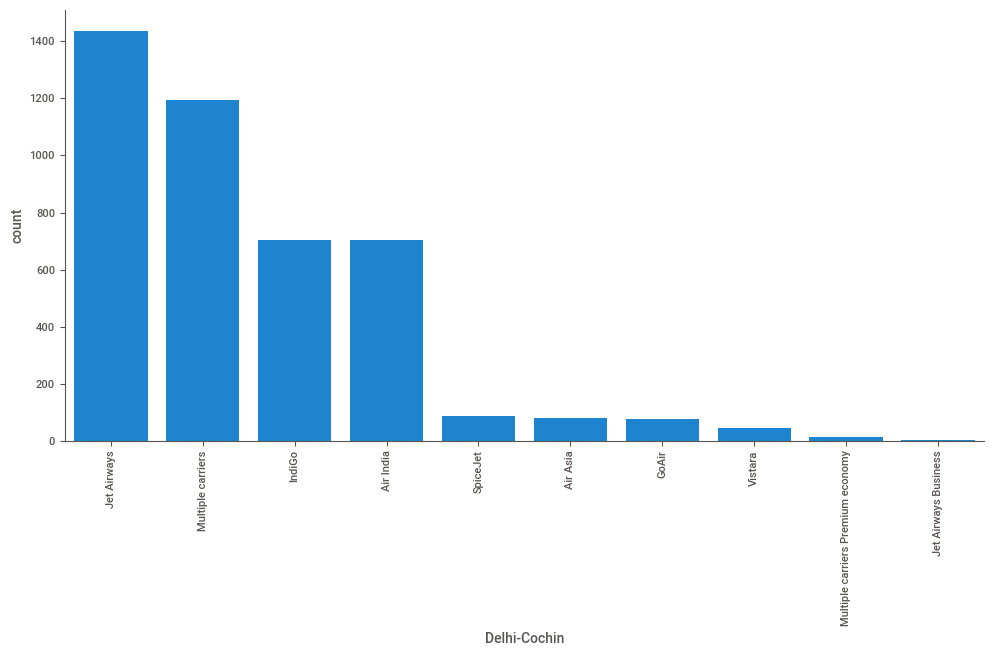

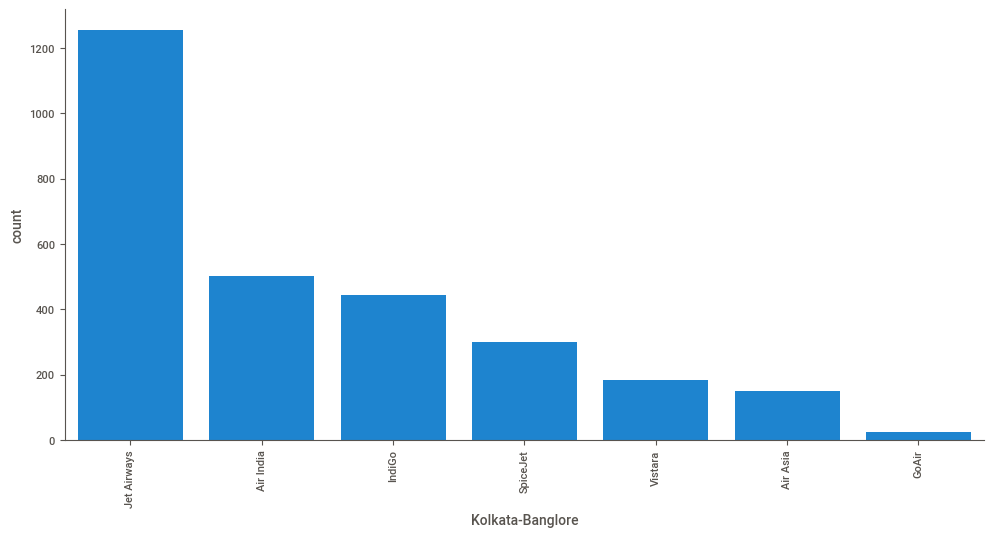

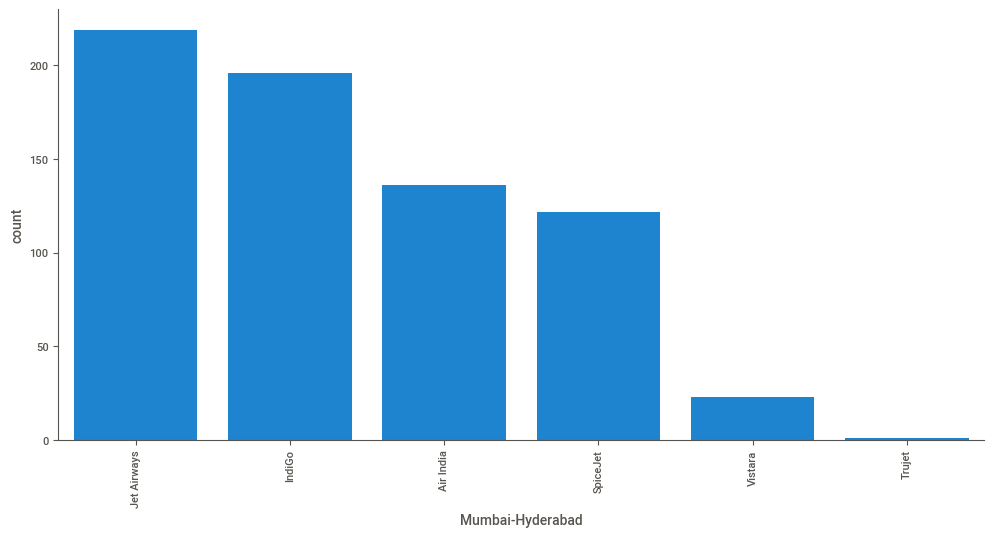

In [255]:
for i in k:
    sns.catplot(data = df_source_dest[df_source_dest['Source - Destination'] == i], x = 'Airline', y = 'count', kind = 'bar', aspect = 2).set_xticklabels(rotation = 90)
    plt.xlabel(i)

#### 🔎 Insights
1. Here we can see that flights are from 'Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'<br>
2. 'Banglore-Delhi','Banglore-New Delhi','Chennai-Kolkata','Delhi-Cochin','Kolkata-Banglore','Mumbai-Hyderabad' these are the start and End points for which the flights are avilable<br>
3. We can see that __Banglore - Delhi__ Have maximum number of Flights of Airline  __Jet Airways__(370),followed by __Indigo__(366)<br>
4. We can see that __Banglore - New Delhi__ , __Jet Airways__(417) has maximum number of Flights, followed by __Air India__(209)<br>
5. From __Chennai - Kolkata__  , __Indigo__(184) has maximum number of Flights, followed by __SpiceJet__(128)<br>
6. From __Delhi - Cochin__ , __Jet Airways__(1438) has maximum number of Flights, followed by __Multiple carriers__(1196)<br>
7. From __Kolkata - Banglore__ ,__Jet Airways__(1256) has maximum number of Flights, followed by __Air India__(501)<br>
8. From __Mumbai - Hydrabad__ , __Jet Airways__(219) has maximum number of Flights , followed by __IndiGo__(196)<br>
 

#### Analysis with Total_Stops

In [258]:
pd.set_option('display.max_rows', 81)

df_journey_stops = df_clean.groupby(['Source','Destination', 'Airline','Total_Stops'])['Price'].mean().reset_index()

In [259]:
df_journey_stops['Source - Destination'] = df_journey_stops['Source'] +'-'+ df_journey_stops['Destination']
df_journey_stops.drop(columns = ['Source','Destination'], inplace = True)
df_journey_stops['Price'] = df_journey_stops['Price'].apply(lambda x: round(x,2))
df_journey_stops

,Airline,Total_Stops,Price,Source - Destination
0,Air Asia,non-stop,4265.58,Banglore-Delhi
1,Air India,non-stop,6045.17,Banglore-Delhi
2,GoAir,non-stop,4050.29,Banglore-Delhi
3,IndiGo,non-stop,4399.58,Banglore-Delhi
4,Jet Airways,non-stop,6412.95,Banglore-Delhi
5,SpiceJet,non-stop,4012.84,Banglore-Delhi
6,Vistara,non-stop,5042.31,Banglore-Delhi
7,Vistara Premium economy,non-stop,5969.00,Banglore-Delhi
8,Air Asia,non-stop,5791.94,Banglore-New Delhi
9,Air India,1 stop,10099.16,Banglore-New Delhi


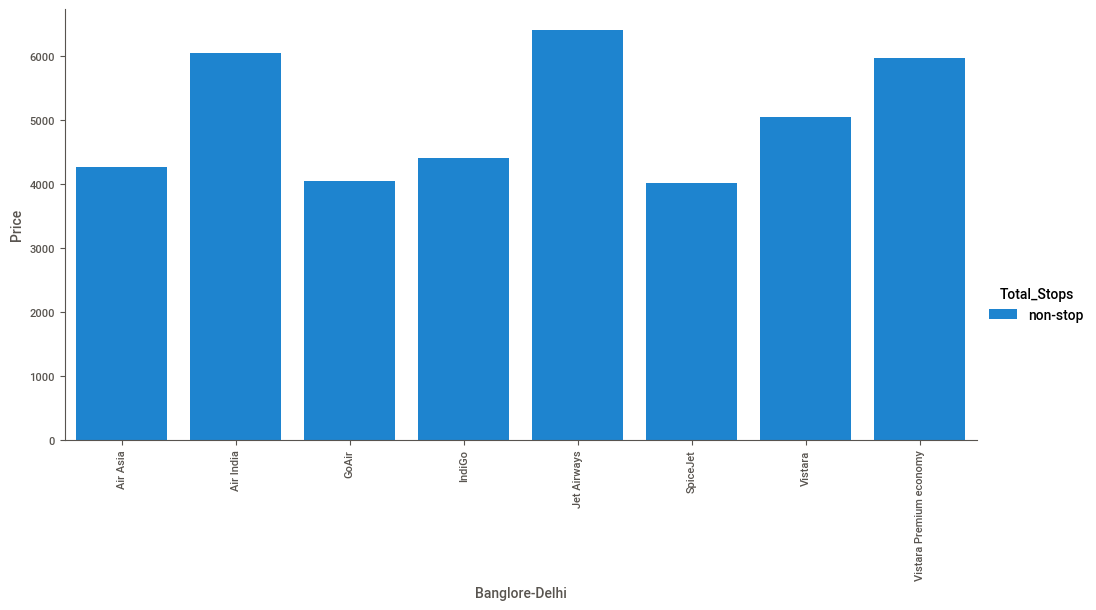

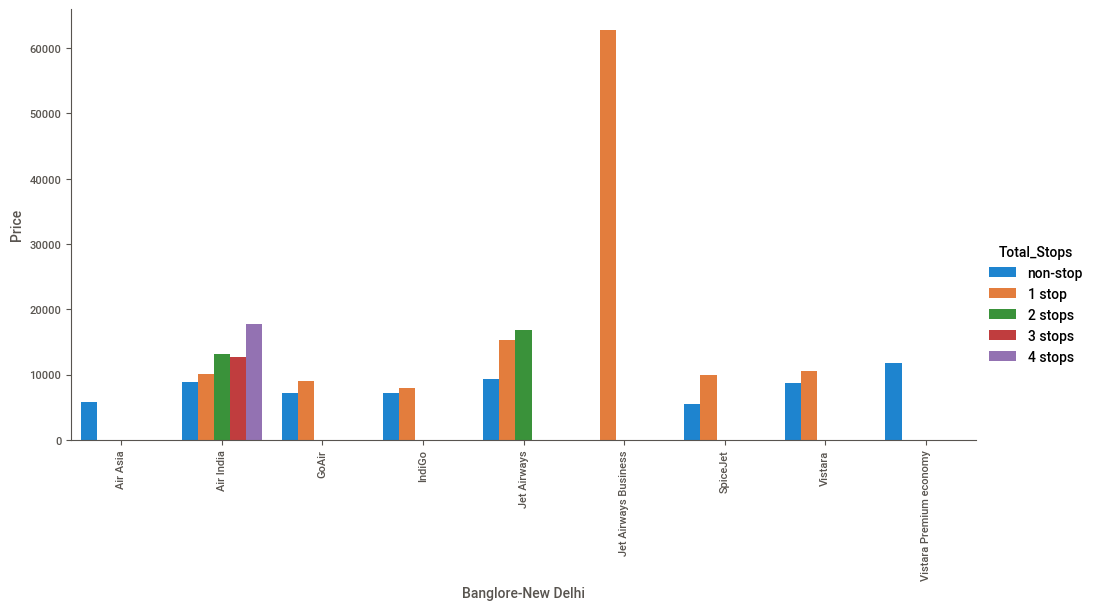

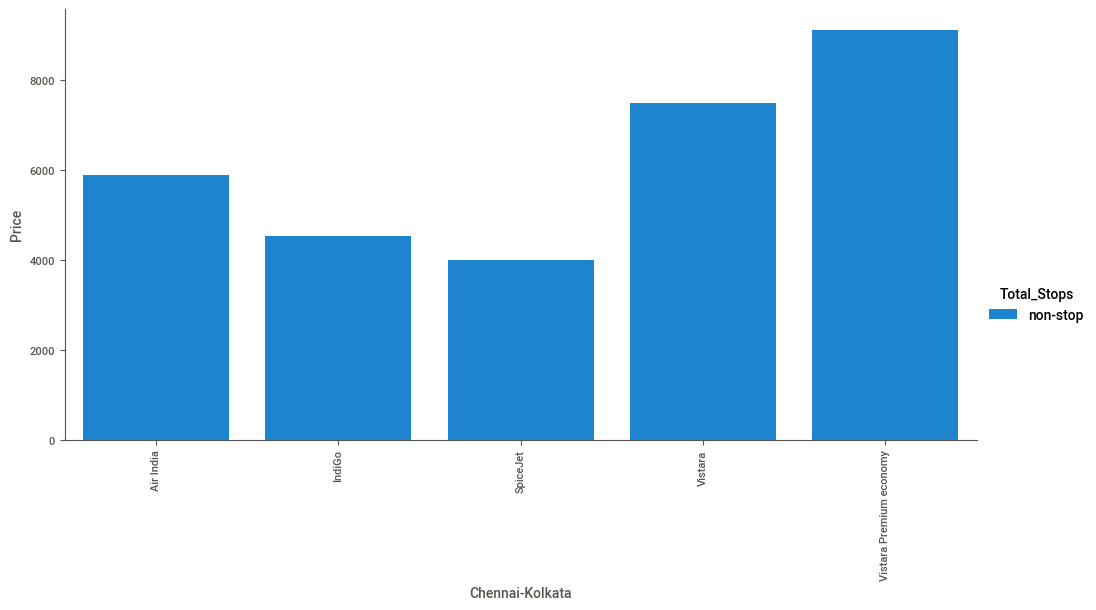

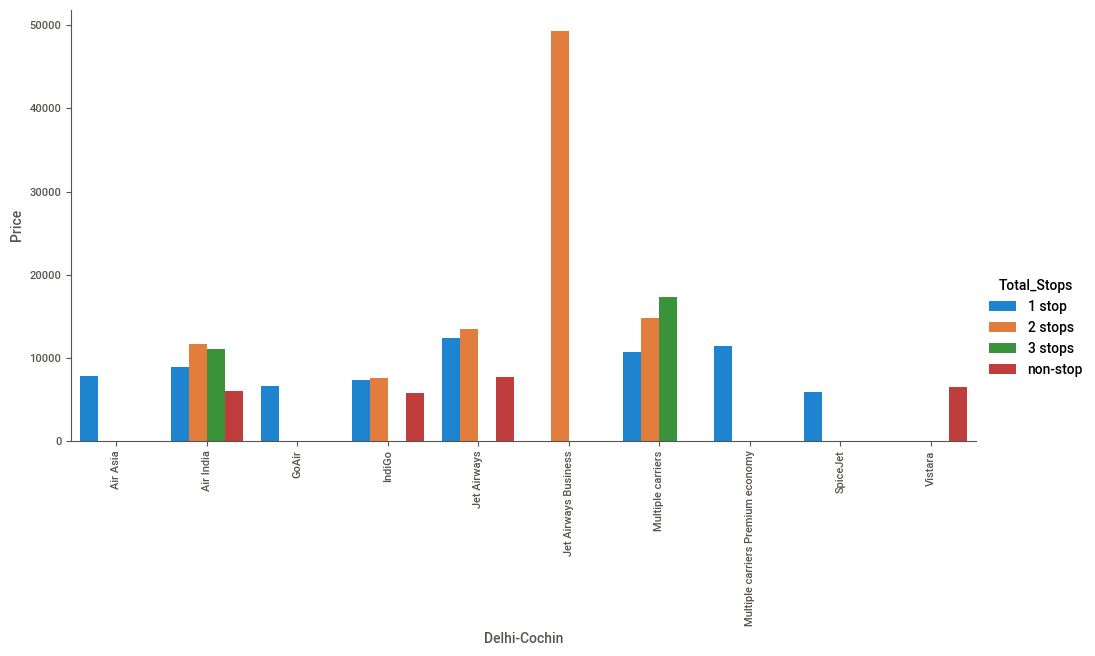

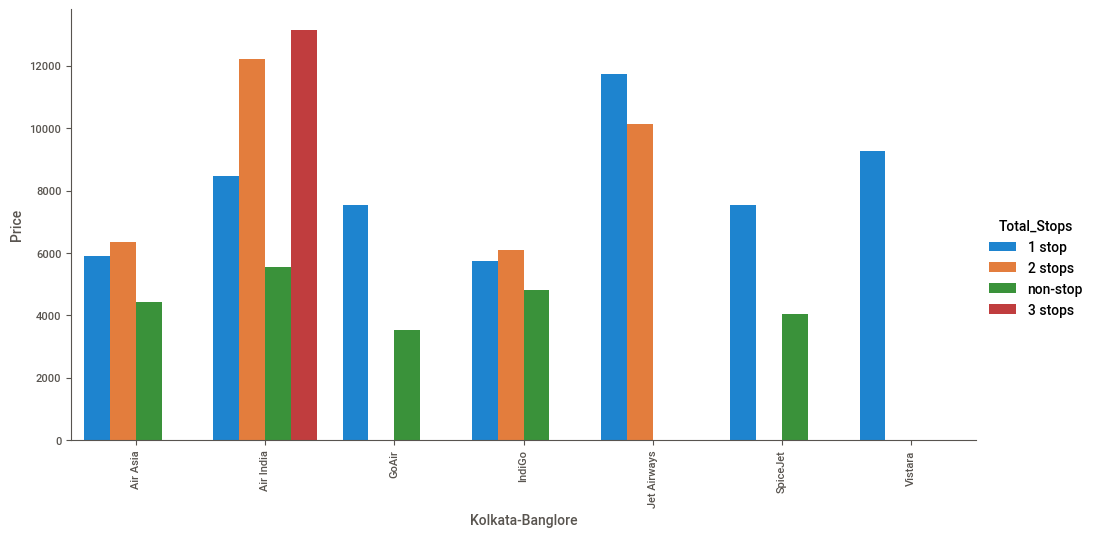

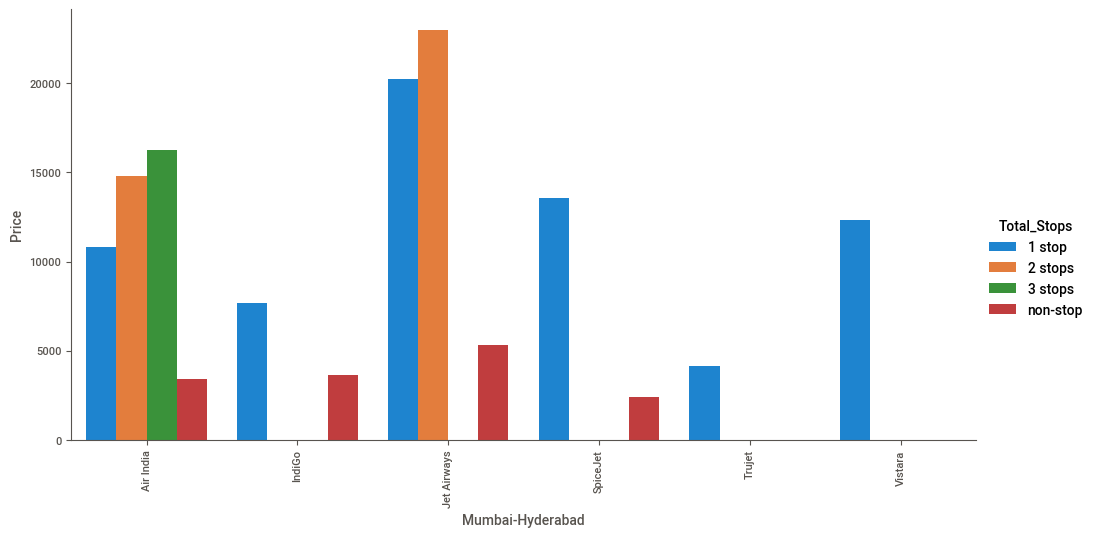

In [260]:
for i in k:
    sns.catplot(data = df_journey_stops[df_journey_stops['Source - Destination'] == i], x = 'Airline', y = 'Price', kind = 'bar',hue='Total_Stops', aspect = 2).set_xticklabels(rotation = 90)
    plt.xlabel(i)

#### 🔎 Insigits

In [262]:
df_journey_stops[df_journey_stops['Source - Destination'] == 'Banglore-Delhi']['Airline'].values

array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'SpiceJet', 'Vistara', 'Vistara Premium economy'], dtype=object)

1. Form __Banglore-Delhi__ journey there are only non-stop flights are present
   1. Air Asia with average price of __4265.58 Rs__
   2. Air India with average price of  __6045.17 Rs__
   3. GoAir with average price of __4050.29 Rs__
   ..........

from above graphs we can observe that as the stops increases the price of the fare is also increases

#### Lets add another column in which we give category to the Dep_Time
1. Early Morning: 4:00  - 6:00 
2. Morning: 6:00  - 12:00 
4. Afternoon: 12:00 - 15:00 
6. Late Afternoon: 15:00 - 18:00 
7. Evening: 18:00 PM - 21:00 
8. Night: 21:00 PM - 00:00 
9. Late Night: 12:00 - 4:00 

In [265]:
df_time = df_clean.copy()

In [266]:
def checkit(x):
    if x >=4 and x< 6:
        return 'Early Morning'
    elif x>=6 and x<12:
        return 'Morning'
    elif x>=12 and x<15:
        return 'Afternoon'
    elif x>=15 and x<18:
        return 'Late Afternoon'
    elif x>=18 and x<21:
        return 'Evening'
    elif x>=21 and x<=23:
        return 'Night'
    elif x>0 and x<4 :
        return 'Late Night'
    elif x == 0:
        return 'Night'

df_time['Time Period'] = df_clean['Dep_Hours'].apply(lambda x: checkit(x))
df_time

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins,Time Period
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,1,5,5,50,13,15,7,25,Early Morning
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,9,6,9,25,4,25,19,0,Morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,12,5,18,5,23,30,5,25,Evening
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info,13302,1,3,16,50,21,35,4,45,Late Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,9,4,19,55,22,25,2,30,Evening
10458,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,23,20,2,35,Evening
10459,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,11,20,3,0,Morning
10460,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No Info,12648,1,3,11,30,14,10,2,40,Morning


In [267]:
df_time['Time Period'].value_counts()

Time Period
Morning           4224
Evening           1634
Late Afternoon    1469
Afternoon         1094
Night             1035
Early Morning      751
Late Night         255
Name: count, dtype: int64

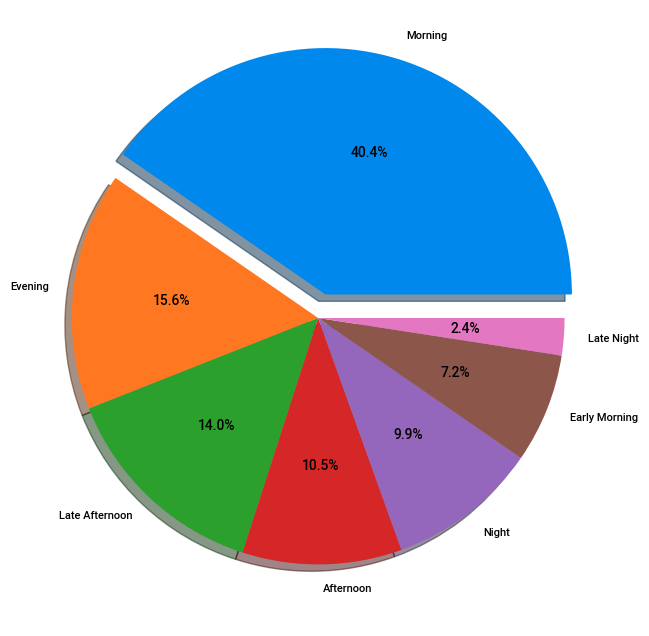

In [268]:
plt.figure(figsize=(8, 8))
plt.pie(x = df_time['Time Period'].value_counts(), labels= df_time['Time Period'].value_counts().index,autopct = '%1.1f%%',explode = [0.1,0,0,0,0,0,0],shadow =True )
plt.show()

#### 🔎 here we can see that maximum percentage of flights are in __Morning__(Morning: 6:00 - 12:00)

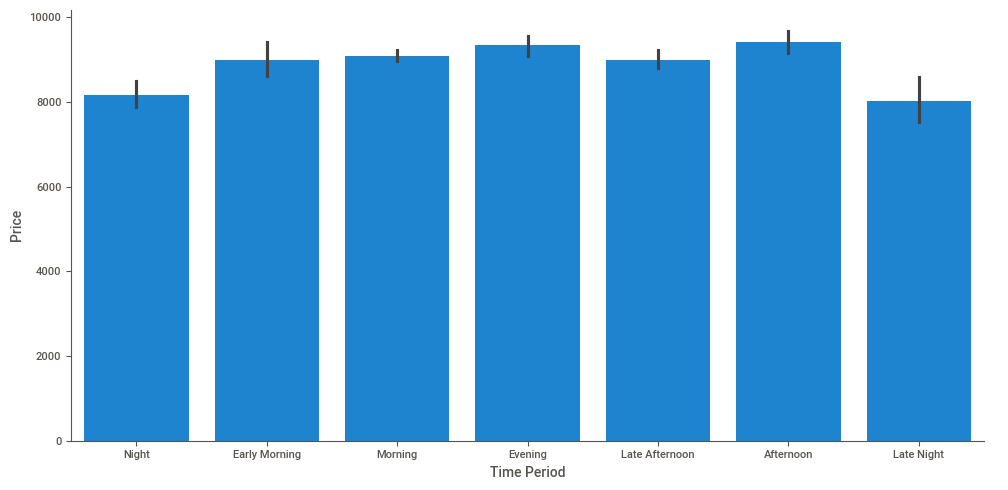

In [270]:
sns.catplot(data = df_time , x = 'Time Period' , y = 'Price', kind = 'bar', estimator = np.mean, aspect = 2 )

#### 🔎 here we can see that Average Fare Price are maximum in Afternoon(12:00 - 15:00) and Evening(18:00 - 21:00)

In [272]:
numerical

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Hours',
 'Dep_Mins',
 'Arrival_Hours',
 'Arrival_Mins',
 'Duration_Hours',
 'Duration_Mins']

#### Now Will analyze Price 

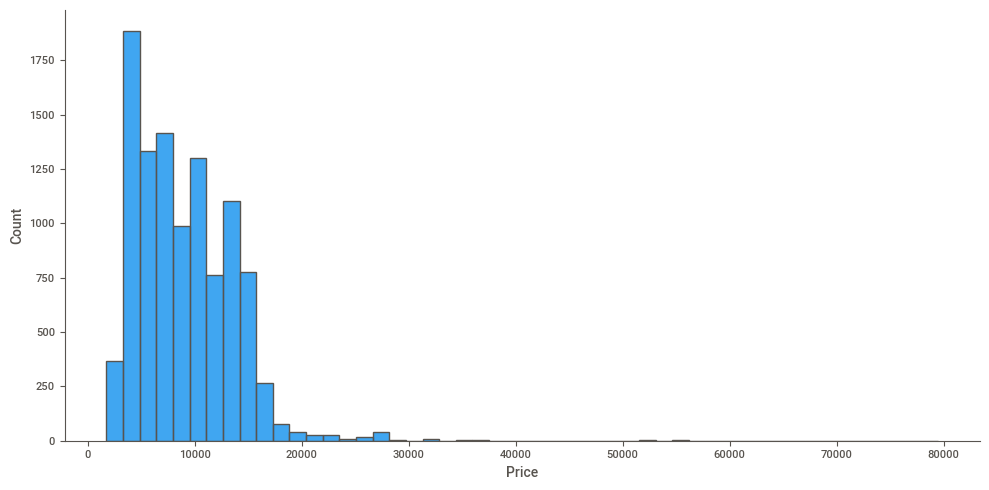

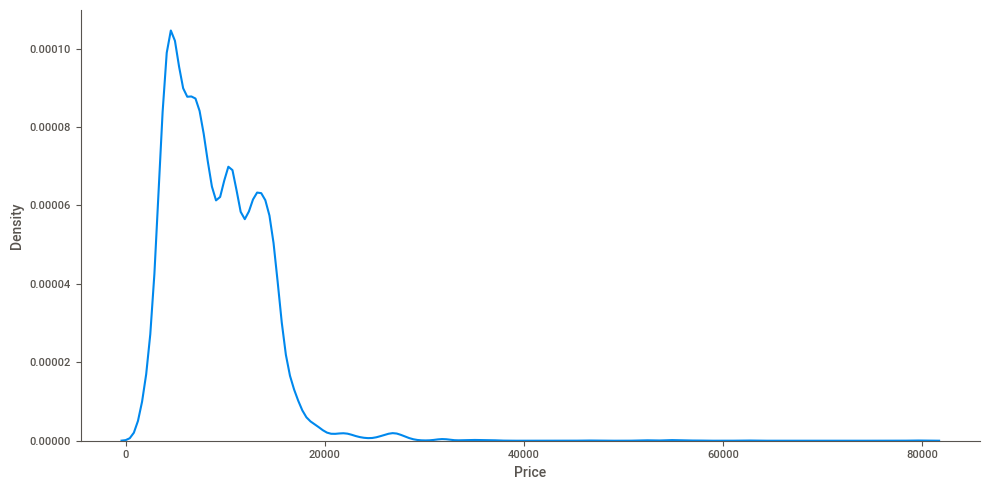

In [274]:
sns.displot(data= df_clean , x = 'Price' ,kind = 'hist', aspect= 2,bins = 50)
sns.displot(data= df_clean , x = 'Price' ,kind = 'kde', aspect= 2)

#### 🔎 Insights 

1. Here we can see that our data is right skewed and most of the Flight Fare Price is between 3000 Rs to 20000 Rs
2. Average Price of the Fare is between 8000 to 12000 Rs

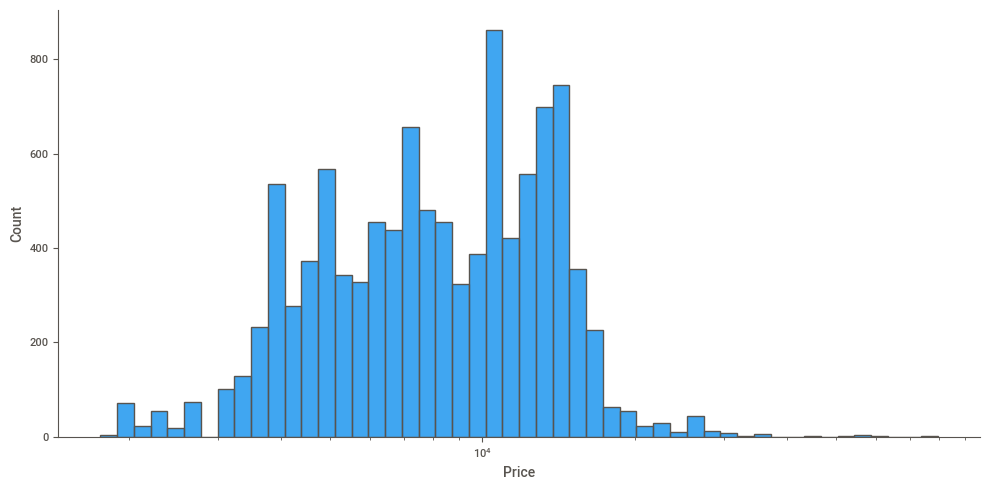

In [277]:
sns.displot(data= df_clean , x = 'Price' ,kind = 'hist', aspect= 2,bins = 50,log_scale = True)

#### Lets check how the Price varies from joueny date

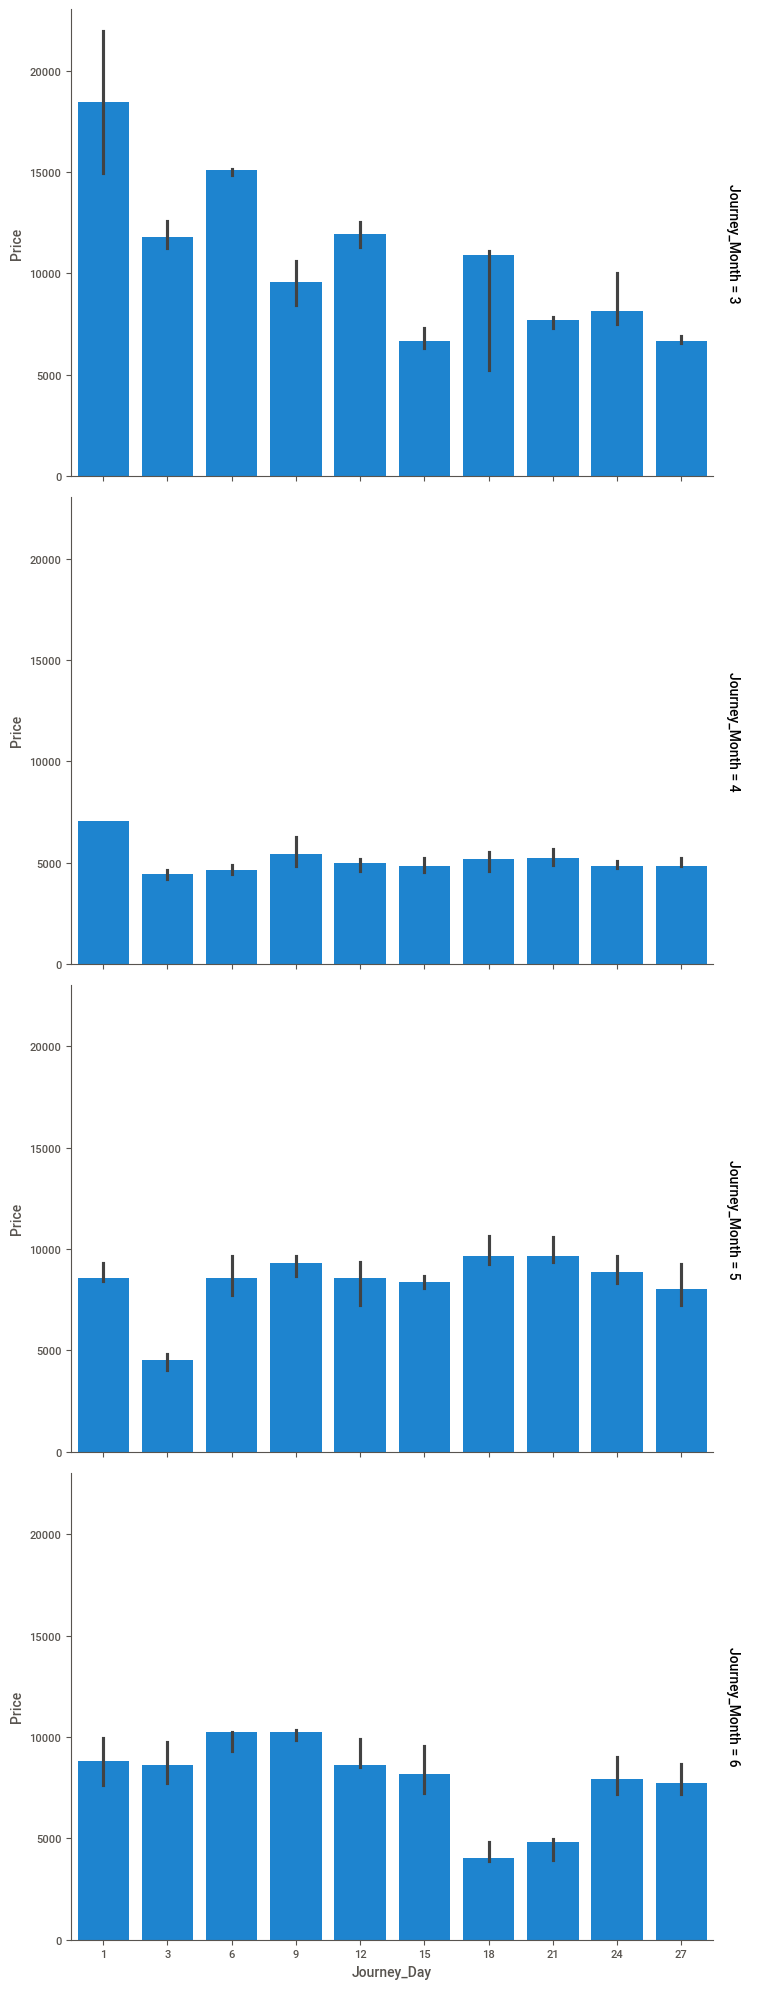

In [279]:
sns.catplot(data = df_clean , x = 'Journey_Day', y = 'Price', estimator = np.median, row = 'Journey_Month', kind = 'bar', aspect =1.5, margin_titles=True )

In [280]:
df_clean['Journey_Day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

#### lets check of Journey Duration vs Price  

In [282]:
df_clean['Duration_Hours'].unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39,  0, 41, 40])

In [283]:
df_clean['Duration_Mins'].unique()

array([50, 25,  0, 45, 30,  5, 15, 35, 10, 20, 55, 40])

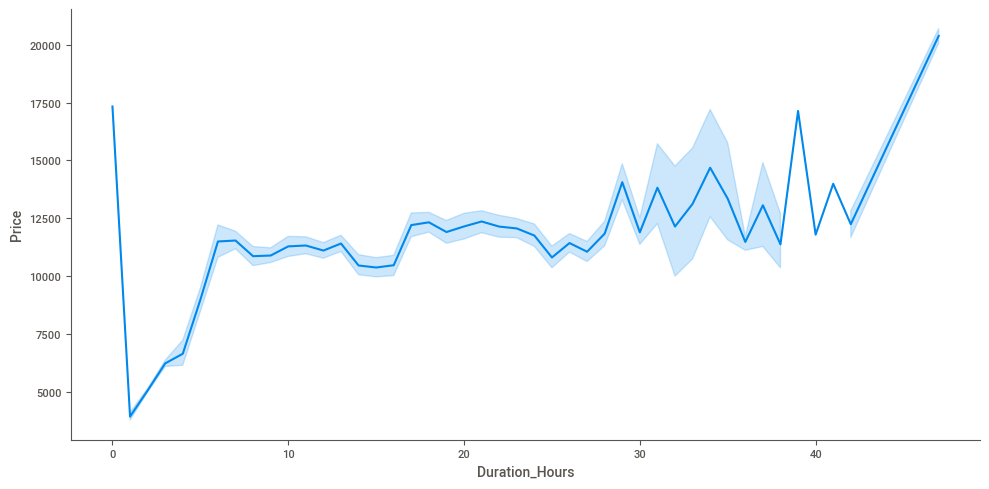

In [284]:
sns.relplot(data = df_clean, x = 'Duration_Hours' , y = 'Price' , kind = 'line', aspect = 2)

#### 🔎 As the Duration Hours Increases the Price of the Fare is also Increases

#### Checking Outliers in Price

<Axes: xlabel='Price'>

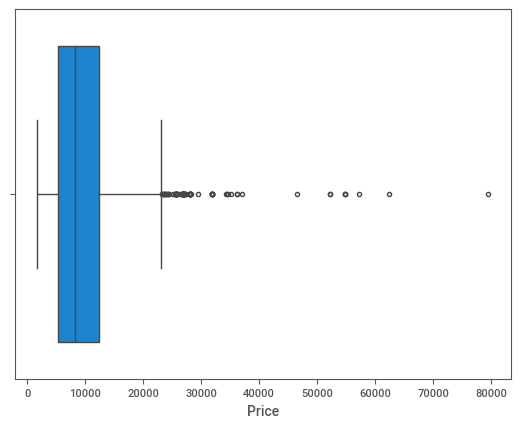

In [287]:
sns.boxplot(data = df_clean, x = 'Price')

#### We can see that there are many outlier on the right side, first we will find out the outliers and make a decision weather it has to remove or what

In [289]:
q1 = df_clean['Price'].quantile(0.25)
q1

5224.0

In [290]:
q3 = df_clean['Price'].quantile(0.75)
q3

12344.75

In [291]:
IQR  = q3 - q1
IQR

7120.75

In [292]:
UB = q3 + 1.5*IQR
UB

23025.875

In [293]:
df_clean[df_clean['Price'] >= UB]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
123,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,27430,1,3,23,0,19,15,20,15
396,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,36983,1,3,12,50,19,15,6,25
486,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No Info,26890,1,3,8,55,15,15,6,20
510,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No Info,26890,1,3,7,0,12,25,5,25
597,Air India,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,2 stops,No Info,25139,6,3,9,40,15,15,29,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,Jet Airways,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,2 stops,No Info,24210,6,3,19,50,16,50,21,0
10159,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,1,3,9,45,14,25,4,40
10178,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No Info,26890,1,3,7,0,5,5,22,5
10231,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No Info,31825,1,3,18,40,9,0,14,20


#### There are 94 entries in which price is greater than Upper Bound

#### As there are only 94 entires which comes into outlier we can do one thing that we make all the entries equal to upper bound and see how the model will behave

In [296]:
df_clean.loc[df_clean['Price'] >= UB,'Price'] = UB

In [297]:
df_clean

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info,13302.0,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107.0,9,4,19,55,22,25,2,30
10458,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145.0,27,4,20,45,23,20,2,35
10459,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229.0,27,4,8,20,11,20,3,0
10460,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No Info,12648.0,1,3,11,30,14,10,2,40


<Axes: xlabel='Price'>

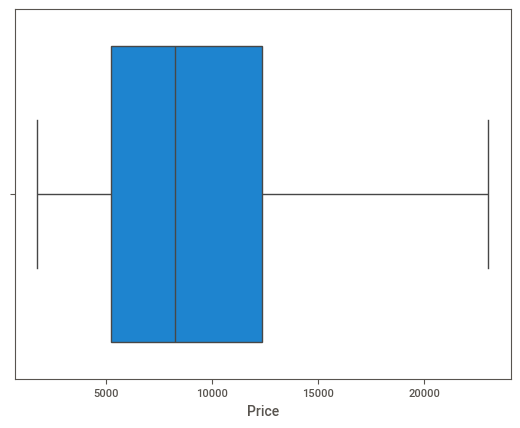

In [298]:
sns.boxplot(data = df_clean, x = 'Price')

In [299]:
import scipy.stats as stats


<Axes: >

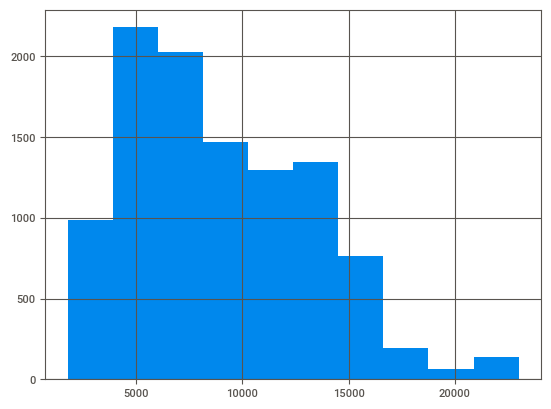

In [300]:
df_clean['Price'].hist()

((array([-3.82175892, -3.59722601, -3.47398465, ...,  3.47398465,
          3.59722601,  3.82175892]),
  array([ 1759.   ,  1759.   ,  1759.   , ..., 23025.875, 23025.875,
         23025.875])),
 (4165.908038275948, 8960.327494742876, 0.9761120305037636))

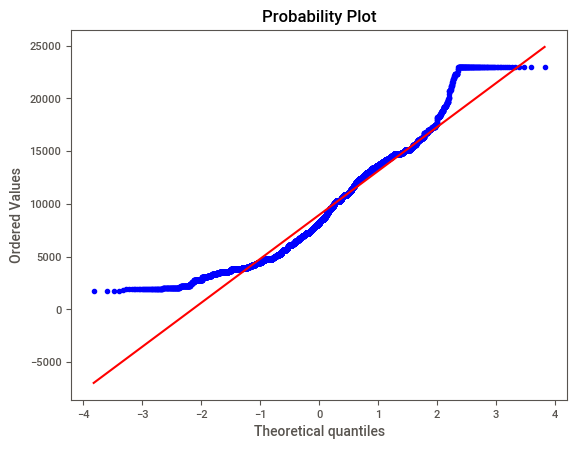

In [301]:
stats.probplot(df_clean['Price'], dist="norm", plot=plt)

##  ✅ Feature Selection & 🛠️ Feature Engineering

In [303]:
numerical_cols = [ 'Journey_Day','Journey_Month','Dep_Hours','Dep_Mins','Arrival_Hours','Arrival_Mins','Duration_Hours','Duration_Mins']

In [304]:
categorical

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

### 1. Encoding 

__Airline__ there is no order in this Feature so we will perform get_dummies() 
__Souce__  there is no order so we use get_dummies() 
__Destination__ there is no order so we use get_dummies() 
__Total_Stops__ there is an order so we will perform Ordinal Encoding

In [307]:
df_clean['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [308]:
Total_stop = ['non-stop','2 stops','1 stop','3 stops','4 stops']
Total_stop

['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']

In [310]:
Airline = df_clean[['Airline']]

In [311]:
Airline = pd.get_dummies(Airline, drop_first = True ).astype('int')

In [312]:
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10457,0,0,0,0,0,0,0,0,0,0,0
10458,1,0,0,0,0,0,0,0,0,0,0
10459,0,0,0,1,0,0,0,0,0,0,0
10460,0,0,0,0,0,0,0,0,0,1,0


In [313]:
Source = df_clean[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype('int')

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [314]:
Destination = df_clean[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True).astype('int')

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [315]:
df_clean['Total_Stops'] =  df_clean['Total_Stops'].map({'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4})

In [316]:
df_clean.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hours          0
Dep_Mins           0
Arrival_Hours      0
Arrival_Mins       0
Duration_Hours     0
Duration_Mins      0
dtype: int64

In [317]:
df_clean.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No Info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No Info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No Info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No Info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No Info,13302.0,1,3,16,50,21,35,4,45


#### Now we will Form  a Single DataFrame

In [319]:
df_final = pd.concat([df_clean,Source,Airline,Destination], axis =1)

In [320]:
df_final

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No Info,3897.0,24,3,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No Info,7662.0,1,5,5,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No Info,13882.0,9,6,9,...,0,0,0,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No Info,6218.0,12,5,18,...,0,0,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No Info,13302.0,1,3,16,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,Air Asia,Kolkata,Banglore,CCU → BLR,0,No Info,4107.0,9,4,19,...,0,0,0,0,0,0,0,0,0,0
10458,Air India,Kolkata,Banglore,CCU → BLR,0,No Info,4145.0,27,4,20,...,0,0,0,0,0,0,0,0,0,0
10459,Jet Airways,Banglore,Delhi,BLR → DEL,0,No Info,7229.0,27,4,8,...,0,0,0,0,0,0,1,0,0,0
10460,Vistara,Banglore,New Delhi,BLR → DEL,0,No Info,12648.0,1,3,11,...,0,0,0,1,0,0,0,0,0,1


In [321]:
df_final.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [322]:
df_final.head()

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hours,Dep_Mins,Arrival_Hours,Arrival_Mins,...,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,0,No Info,3897.0,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2,No Info,7662.0,1,5,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2,No Info,13882.0,9,6,9,25,4,25,...,0,0,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1,No Info,6218.0,12,5,18,5,23,30,...,0,0,0,0,0,0,0,0,0,0
4,BLR → NAG → DEL,1,No Info,13302.0,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


#### Route feature should be droped because we already placed Total_Stops Features so its show same thing
#### Additional_Info also giving no information because most of the row contain No Info data

In [324]:
df_final.drop(columns = ['Route', 'Additional_Info'], axis = 1, inplace = True)

In [325]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10462 non-null  int64  
 1   Price                                      10462 non-null  float64
 2   Journey_Day                                10462 non-null  int64  
 3   Journey_Month                              10462 non-null  int64  
 4   Dep_Hours                                  10462 non-null  int64  
 5   Dep_Mins                                   10462 non-null  int64  
 6   Arrival_Hours                              10462 non-null  int64  
 7   Arrival_Mins                               10462 non-null  int64  
 8   Duration_Hours                             10462 non-null  int64  
 9   Duration_Mins                              10462 non-null  int64  
 10  Source_Chennai        

### Now lets check the Correlation Between the columns

In [327]:
df_final.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours',
       'Dep_Mins', 'Arrival_Hours', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

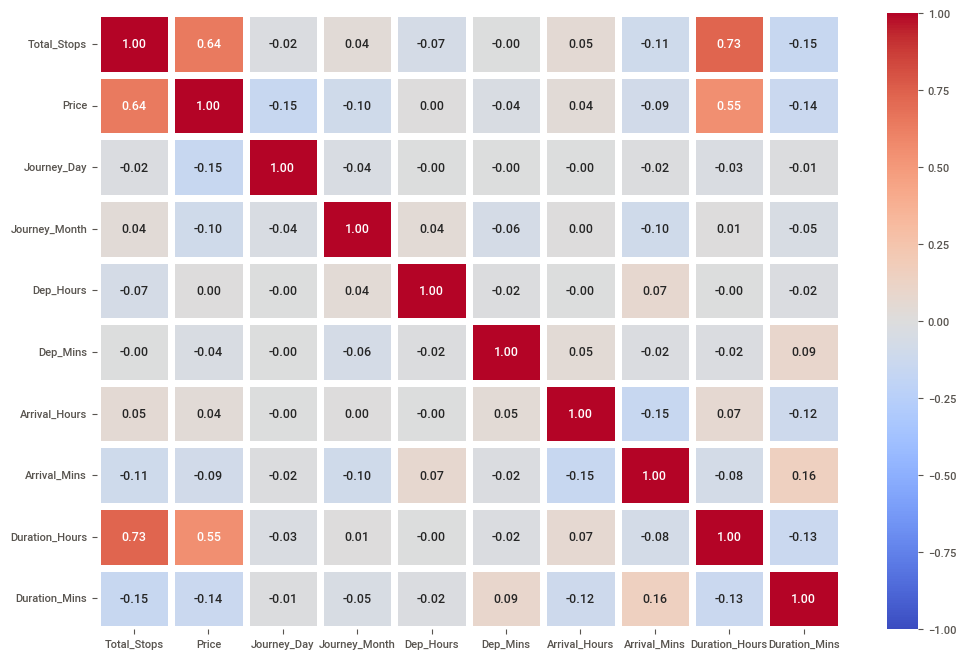

In [328]:
plt.figure(figsize = (12,8))
sns.heatmap(df_final[['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hours',
       'Dep_Mins', 'Arrival_Hours', 'Arrival_Mins', 'Duration_Hours',
       'Duration_Mins']].corr(), annot = True ,vmin=-1,vmax=1,cmap = "coolwarm",annot_kws={"size": 9},linewidths=5,fmt= '.2f')
plt.show()

#### 🔎 Insights

1. We can see that Duration_Hours and Total_Stops showing +ve correlation with price
2. Total_Stops have strong correlation with Price
3. we can also see that Duration_Hours and Total_Stops also have +ve correlation but it dosent means that they are collinear

Now, __df_final__ is our final dataset now we will pass this dataset for __Model Creation__

In [332]:
#pd.set_option('display.max_columns', None)

In [333]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

In [334]:
# vif = []
# for i in range(1,30):
#     vif.append(variance_inflation_factor(df_final.iloc[:,:],i))

In [335]:
# pd.DataFrame({'vif': vif},index = df_final.columns[:])

##  🗄️ We we save this dataset in an Excel File then Pass this File For __Model Creation__

In [337]:
df_final.to_excel('final_dataset.xlsx', index = False)